# Introduction

In this dataset I tried to predict target.

1. [Entering and Cleaning Data](#1)
1. [Train Test Split](#2)
1. [Initialize Weights and Bias](#3)
1. [Sigmoid Function](#4)
1. [Forward Backward Propagation](#5)
1. [Update Part](#6)
1. [Prediction Part](#7)
1. [Logistic Regression](#8)
1. [Logistic Regression with Sklearn](#9)


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/heart-disease-uci/heart.csv


<a id="1"></a><br>
# Entering and Cleaning Data

In [2]:
df=pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
x_data=df.drop(["target"],axis=1)
    
x=((x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))).values

In [6]:
y=df.target.values

<a id="2"></a><br>
# Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

x_train=x_train.T
x_test=x_test.T
y_train=y_train.T
y_test=y_test.T

print("x train shape: ",x_train.shape)
print("x test shape: ",x_test.shape)
print("y train shape: ",y_train.shape)
print("y test shape: ",y_test.shape)

x train shape:  (13, 242)
x test shape:  (13, 61)
y train shape:  (242,)
y test shape:  (61,)


<a id="3"></a><br>
# Initialize Weights and Bias

In [8]:
def initialize_weights_and_bias(dimension):
    w=np.full((dimension,1),0.01)
    b=0.0
    return w,b


<a id="4"></a><br>
# Sigmoid Function

In [9]:
def sigmoid(z):
    y_head=1/(1+np.exp(-z))
    return y_head

<a id="5"></a><br>
# Forward Backward Propagation

In [10]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z=np.dot(w.T,x_train)+b
    y_head = sigmoid(z)
    loss= -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    
    # backward propagation
    derivative_weight= (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias=np.sum(y_head-y_train)/x_train.shape[1]
    gradients={"derivative_weight":derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

<a id="6"></a><br>
# Update Part

In [11]:
def update(w,b,x_train,y_train,learning_rate,number_of_iteration):
    cost_list=[]
    cost_list2=[]
    index=[]
    
    for i in range(number_of_iteration):
        
        cost,gradients=forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        w=w- learning_rate*gradients["derivative_weight"]
        
        b= b - learning_rate*gradients["derivative_bias"]
        
        if i%10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("cost after iteration {}:{}".format(i,cost))
            
    parameters={"weight":w,"bias":b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation = "vertical")
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost")
    plt.show()
    
    return parameters,gradients,cost_list

<a id="7"></a><br>
# Prediction Part

In [12]:
def predict(w,b,x_test):
    z=sigmoid(np.dot(w.T,x_test)+b)
    
    Y_prediction=np.zeros((1,x_test.shape[1]))
    
    for i in range(z.shape[1]):
        if z[0,i]<=0.5:
            Y_prediction[0,i]=0
        else:
            Y_prediction[0,i]=1
    
    return Y_prediction

<a id="8"></a><br>
# Logistic Regression

In [13]:
def logistic_regression(x_train,y_train,x_test,y_test,learning_rate,num_iterations):
    dimension=x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    
    parameters,gradients,cost_list = update(w,b,x_train,y_train,learning_rate,num_iterations)
    
    y_prediction_test= predict(parameters["weight"],parameters["bias"],x_test)
    
    print("test accuracy: {} %".format(100- np.mean(np.abs(y_prediction_test- y_test))*100))

cost after iteration 0:0.6925159739160683
cost after iteration 10:0.46301529607626973
cost after iteration 20:0.41883852171962555
cost after iteration 30:0.3992251649443057
cost after iteration 40:0.3878058419813098
cost after iteration 50:0.38029111873170107
cost after iteration 60:0.3749743232688432
cost after iteration 70:0.37101948083239716
cost after iteration 80:0.3679652102235271
cost after iteration 90:0.36553608699500434
cost after iteration 100:0.3635579982046243
cost after iteration 110:0.36191582293763647


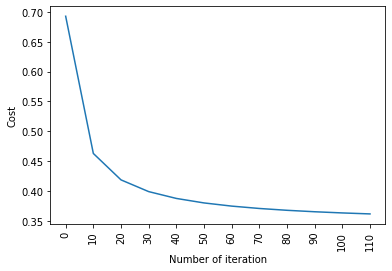

test accuracy: 85.24590163934427 %


In [14]:
logistic_regression(x_train,y_train,x_test,y_test,learning_rate=2,num_iterations=120)

<a id="9"></a><br>
# Logistic Regresion with Sklearn

In [15]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(x_train.T,y_train.T)

print("test accuracy {} %".format(lr.score(x_test.T,y_test.T)*100))
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

test accuracy 85.24590163934425 %
